In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [3]:
# 更改数据特征类型-one hot编码
train_values = pd.read_csv('train_values_dummy.csv', index_col='patient_id')
train_labels = pd.read_csv('train_labels.csv', index_col='patient_id')
for i,j in zip([1,2,3],['A','B','C']):
    train_values.ix[train_values['slope_of_peak_exercise_st_segment']==i,'slope_of_peak_exercise_st_segment']=j
for i,j in zip([1,2,3,4],['A','B','C','D']):
    train_values.ix[train_values['chest_pain_type']==i,'chest_pain_type']=j    
for i,j in zip([0,1,2,3],['A','B','C','D']):
    train_values.ix[train_values['num_major_vessels']==i,'num_major_vessels']=j    
for i,j in zip([0,1],['A','B']):
    train_values.ix[train_values['fasting_blood_sugar_gt_120_mg_per_dl']==i,'fasting_blood_sugar_gt_120_mg_per_dl']=j    
for i,j in zip([0,1,2,3],['A','B','C','D']):
    train_values.ix[train_values['num_major_vessels']==i,'num_major_vessels']=j    
for i,j in zip([0,1,2],['A','B','C']):
    train_values.ix[train_values['resting_ekg_results']==i,'resting_ekg_results']=j    
for i,j in zip([0,1],['M','F']):
    train_values.ix[train_values['sex']==i,'sex']=j    
for i,j in zip([0,1],['T','F']):
    train_values.ix[train_values['exercise_induced_angina']==i,'exercise_induced_angina']=j    

reg_feature_list = ['resting_blood_pressure','serum_cholesterol_mg_per_dl','max_heart_rate_achieved','age','oldpeak_eq_st_depression']

train_values.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
patient_id,,,,,,,,,,,,,
0z64un,A,normal,128,B,A,A,C,308,0.0,F,45,170,T
ryoo3j,B,normal,110,C,A,A,A,214,1.6,M,54,158,T
yt1s1x,A,normal,125,D,D,A,C,304,0.0,F,77,162,F
l2xjde,A,reversible_defect,152,D,A,A,A,223,0.0,F,40,181,T
oyt4ek,C,reversible_defect,178,A,A,A,C,270,4.2,F,59,145,T


In [4]:
train_values = pd.get_dummies(train_values)
train_values.head()

,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved,slope_of_peak_exercise_st_segment_A,slope_of_peak_exercise_st_segment_B,slope_of_peak_exercise_st_segment_C,thal_fixed_defect,thal_normal,...,num_major_vessels_D,fasting_blood_sugar_gt_120_mg_per_dl_A,fasting_blood_sugar_gt_120_mg_per_dl_B,resting_ekg_results_A,resting_ekg_results_B,resting_ekg_results_C,sex_F,sex_M,exercise_induced_angina_F,exercise_induced_angina_T
patient_id,,,,,,,,,,,,,,,,,,,,,
0z64un,128,308,0.0,45,170,1,0,0,0,1,...,0,1,0,0,0,1,1,0,0,1
ryoo3j,110,214,1.6,54,158,0,1,0,0,1,...,0,1,0,1,0,0,0,1,0,1
yt1s1x,125,304,0.0,77,162,1,0,0,0,1,...,1,1,0,0,0,1,1,0,1,0
l2xjde,152,223,0.0,40,181,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1
oyt4ek,178,270,4.2,59,145,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,1


In [5]:
# 添加新特征
# serum_cholesterol_mg_per_dl 中位数
serum_0 = list()
serum_1 = list()
serum_c = list()
for i in range(len(train_values.index)):
    temp_0 = train_values['serum_cholesterol_mg_per_dl'][i] - 237.5
    temp_1 = train_values['serum_cholesterol_mg_per_dl'][i] - 255.5
    serum_0.append(temp_0)
    serum_1.append(temp_1)
    if abs(temp_0)>abs(temp_1):
        serum_c.append(0)
    else:
        serum_c.append(1)     
# oldpeak_eq_st_depression   中位数
peak_0 = list()
peak_1 = list()
peak_c = list()
for i in range(len(train_values.index)):
    temp_0 = train_values['oldpeak_eq_st_depression'][i] - 0.25
    temp_1 = train_values['oldpeak_eq_st_depression'][i] - 1.40
    peak_0.append(temp_0)
    peak_1.append(temp_1)
    if abs(temp_0)>abs(temp_1):
        peak_c.append(0)
    else:
        peak_c.append(1)    
# oldpeak_eq_st_depression   中位数
heart_0 = list()
heart_1 = list()
heart_c = list()
for i in range(len(train_values.index)):
    temp_0 = train_values['max_heart_rate_achieved'][i] - 160
    temp_1 = train_values['max_heart_rate_achieved'][i] - 142
    heart_0.append(temp_0)
    heart_1.append(temp_1)
    if abs(temp_0)>abs(temp_1):
        heart_c.append(0)
    else:
        heart_c.append(1)
# age   中位数
age_0 = list()
age_1 = list()
age_c = list()
for i in range(len(train_values.index)):
    temp_0 = train_values['age'][i] - 53.5
    temp_1 = train_values['age'][i] - 58.0
    age_0.append(temp_0)
    age_1.append(temp_1)
    if abs(temp_0)>abs(temp_1):
        age_c.append(0)
    else:
        age_c.append(1)        
        
train_values['serum_0'] = serum_0
train_values['serum_1'] = serum_1
train_values['serum_c'] = serum_c  
                          
train_values['peak_0'] = peak_0
train_values['peak_1'] = peak_1
train_values['peak_c'] = peak_c  
                          
train_values['heart_0'] = heart_0
train_values['heart_1'] = heart_1
train_values['heart_c'] = heart_c

train_values['age_0'] = age_0
train_values['age_1'] = age_1
train_values['age_c'] = age_c

In [6]:
# 数据归一化
# scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(0, 1)) 
temp_train_values = scaler.fit_transform(train_values)
train_values = pd.DataFrame(temp_train_values, columns = train_values.columns)

resting_blood_pressure_mean = list()
serum_cholesterol_mg_per_dl_mean = list()
max_heart_rate_achieved_mean = list()
age_mean = list()
for f in reg_feature_list:
    temp_list = list()
    for i in range(len(train_values.index)):
        temp_list.append(train_values[f][i] - np.mean(train_values[f]))
    train_values[f+'_mean'] = temp_list

print(train_values.columns)
train_values.head() 

c:\users\jomin\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Index(['resting_blood_pressure', 'serum_cholesterol_mg_per_dl',
       'oldpeak_eq_st_depression', 'age', 'max_heart_rate_achieved',
       'slope_of_peak_exercise_st_segment_A',
       'slope_of_peak_exercise_st_segment_B',
       'slope_of_peak_exercise_st_segment_C', 'thal_fixed_defect',
       'thal_normal', 'thal_reversible_defect', 'chest_pain_type_A',
       'chest_pain_type_B', 'chest_pain_type_C', 'chest_pain_type_D',
       'num_major_vessels_A', 'num_major_vessels_B', 'num_major_vessels_C',
       'num_major_vessels_D', 'fasting_blood_sugar_gt_120_mg_per_dl_A',
       'fasting_blood_sugar_gt_120_mg_per_dl_B', 'resting_ekg_results_A',
       'resting_ekg_results_B', 'resting_ekg_results_C', 'sex_F', 'sex_M',
       'exercise_induced_angina_F', 'exercise_induced_angina_T', 'serum_0',
       'serum_1', 'serum_c', 'peak_0', 'peak_1', 'peak_c', 'heart_0',
       'heart_1', 'heart_c', 'age_0', 'age_1', 'age_c',
       'resting_blood_pressure_mean', 'serum_cholesterol_mg_per_dl_mea

,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved,slope_of_peak_exercise_st_segment_A,slope_of_peak_exercise_st_segment_B,slope_of_peak_exercise_st_segment_C,thal_fixed_defect,thal_normal,...,heart_1,heart_c,age_0,age_1,age_c,resting_blood_pressure_mean,serum_cholesterol_mg_per_dl_mean,max_heart_rate_achieved_mean,age_mean,oldpeak_eq_st_depression_mean
0,0.395349,0.415525,0.000000,0.333333,0.698113,1.0,0.0,0.0,0.0,1.0,...,0.698113,1.0,0.333333,0.333333,1.0,-0.038501,0.134221,0.193553,-0.204398,-0.162903
1,0.186047,0.200913,0.258065,0.520833,0.584906,0.0,1.0,0.0,0.0,1.0,...,0.584906,1.0,0.520833,0.520833,1.0,-0.247804,-0.080391,0.080346,-0.016898,0.095161
2,0.360465,0.406393,0.000000,1.000000,0.622642,1.0,0.0,0.0,0.0,1.0,...,0.622642,1.0,1.000000,1.000000,0.0,-0.073385,0.125089,0.118082,0.462269,-0.162903
3,0.674419,0.221461,0.000000,0.229167,0.801887,1.0,0.0,0.0,0.0,0.0,...,0.801887,1.0,0.229167,0.229167,1.0,0.240568,-0.059843,0.297327,-0.308565,-0.162903
4,0.976744,0.328767,0.677419,0.625000,0.462264,0.0,0.0,1.0,0.0,0.0,...,0.462264,0.0,0.625000,0.625000,0.0,0.542894,0.047463,-0.042296,0.087269,0.514516


In [7]:
#train_values.dtypes

In [8]:
#train_labels.head()

In [9]:
#train_labels.heart_disease_present.value_counts().plot.bar(title='Number with Heart Disease')

c:\users\jomin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


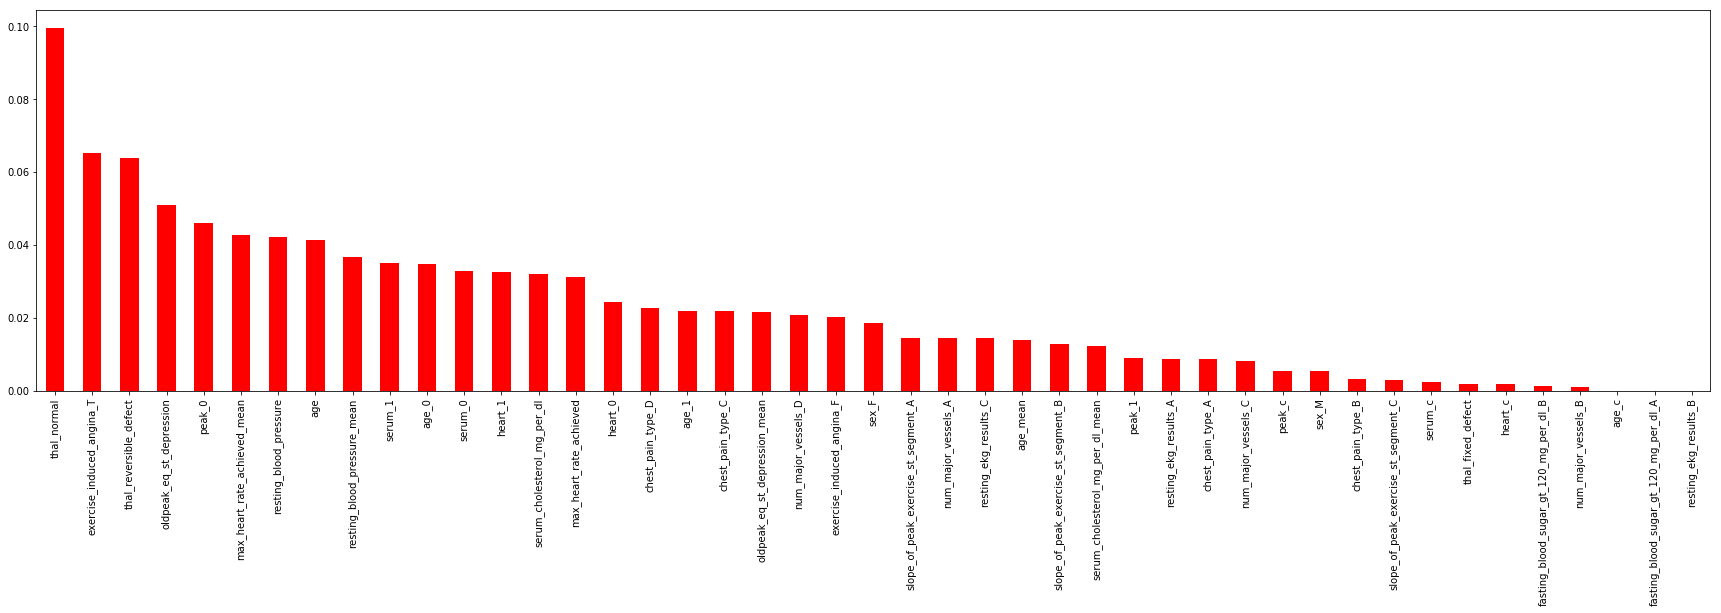

In [10]:
from sklearn.ensemble import RandomForestClassifier
# use random forest for feature selection
rfc = RandomForestClassifier()
rfc.fit(train_values, train_labels)
# print(rfc.feature_importances_)
plt.figure(figsize=(30, 7))
features = pd.Series(rfc.feature_importances_, index= train_values.columns)
features.nlargest(50).plot(kind = 'bar', color = 'r')
plt.show()

In [11]:
print(len(list(train_values.columns)))
print(features.nlargest(50))
features.nlargest(50).index

45
thal_normal                               0.099397
exercise_induced_angina_T                 0.065174
thal_reversible_defect                    0.063807
oldpeak_eq_st_depression                  0.050981
peak_0                                    0.045982
max_heart_rate_achieved_mean              0.042669
resting_blood_pressure                    0.042148
age                                       0.041325
resting_blood_pressure_mean               0.036674
serum_1                                   0.035001
age_0                                     0.034747
serum_0                                   0.032835
heart_1                                   0.032658
serum_cholesterol_mg_per_dl               0.031941
max_heart_rate_achieved                   0.031210
heart_0                                   0.024243
chest_pain_type_D                         0.022799
age_1                                     0.021819
chest_pain_type_C                         0.021728
oldpeak_eq_st_depression_mea

Index(['thal_normal', 'exercise_induced_angina_T', 'thal_reversible_defect',
       'oldpeak_eq_st_depression', 'peak_0', 'max_heart_rate_achieved_mean',
       'resting_blood_pressure', 'age', 'resting_blood_pressure_mean',
       'serum_1', 'age_0', 'serum_0', 'heart_1', 'serum_cholesterol_mg_per_dl',
       'max_heart_rate_achieved', 'heart_0', 'chest_pain_type_D', 'age_1',
       'chest_pain_type_C', 'oldpeak_eq_st_depression_mean',
       'num_major_vessels_D', 'exercise_induced_angina_F', 'sex_F',
       'slope_of_peak_exercise_st_segment_A', 'num_major_vessels_A',
       'resting_ekg_results_C', 'age_mean',
       'slope_of_peak_exercise_st_segment_B',
       'serum_cholesterol_mg_per_dl_mean', 'peak_1', 'resting_ekg_results_A',
       'chest_pain_type_A', 'num_major_vessels_C', 'peak_c', 'sex_M',
       'chest_pain_type_B', 'slope_of_peak_exercise_st_segment_C', 'serum_c',
       'thal_fixed_defect', 'heart_c',
       'fasting_blood_sugar_gt_120_mg_per_dl_B', 'num_major_vessels

In [12]:
selected_features = ['sex_F','chest_pain_type_D', 'num_major_vessels_A','heart_0','age_1',
       'serum_cholesterol_mg_per_dl_mean', 'max_heart_rate_achieved','resting_blood_pressure_mean',
       'oldpeak_eq_st_depression','thal_normal','thal_reversible_defect','oldpeak_eq_st_depression_mean',
       'serum_cholesterol_mg_per_dl','resting_blood_pressure','slope_of_peak_exercise_st_segment_A']
train_values_subset = train_values[selected_features]

In [13]:
# for preprocessing the data
from sklearn.preprocessing import StandardScaler
# the model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
import catboost as cb
# from sklearn.ensemble import VotingRegressor
# for combining the preprocess with model training
from sklearn.pipeline import Pipeline

# for optimizing parameters of the pipeline
from sklearn.model_selection import GridSearchCV

In [14]:
# LogisticRegression [添加全部数据特征]0.6856
# pipe = Pipeline(steps=[('scale', StandardScaler()), 
#                        ('logistic', LogisticRegression())])
# param_grid = {'logistic__C': [0.0001, 0.001, 0.01, 1, 10],'logistic__penalty': ['l1', 'l2']}

# BayesianRidge    0.53845    [全部特征]0.3657
pipe1 = Pipeline(steps=[('scale', StandardScaler()), 
                       ('bay', BayesianRidge())])
param_grid1 = {'bay__alpha_1': [1e-06],'bay__alpha_2': [1e-06,1e-05,1e-04],
               'bay__n_iter':np.arange(100,200,100),'bay__fit_intercept':[True,False],
               'bay__lambda_1':[1e-06,1e-05],'bay__lambda_2':[1e-06,1e-05],'bay__tol':[0.0001,0.0002]}

# (alpha_1=10, lambda_1=10)

# RandomForestRegressor  0.54856 
# pipe2 = Pipeline(steps=[('scale', StandardScaler()), 
#                        ('rf', RandomForestRegressor())])
# param_grid2 = {'rf__n_estimators':np.arange(100,300,100),'rf__min_samples_leaf':np.arange(2,8,2),'rf__max_depth':[3,4,5,6]}

# LGBMRegressor   0.55472 
# pipe3 = Pipeline(steps=[('scale', StandardScaler()), 
#                        ('lgbm', LGBMRegressor())])
# param_grid3 = {'lgbm__max_depth': [4, 5, 6],'lgbm__min_child_samples': np.arange(16,30,2),
#               'lgbm__learning_rate': [.01, .05, .1, .5],'lgbm__num_leaves':[21,23,25]}

# CatBoostRegression    0.37287 
# pipe4 = Pipeline(steps=[('scale', StandardScaler()), 
#                        ('cb', cb.CatBoostRegressor())])
# param_grid4 = {'cb__learning_rate':[0.005,0.01],'cb__l2_leaf_reg':[7],'cb__iterations':[500],'cb__depth':[6,7,8]}

# XGBRegressor   0.5946
# pipe = Pipeline(steps=[('scale', StandardScaler()), 
#                        ('xgb', xgb.XGBRegressor())])
# param_grid = {'xgb__max_depth':[3,4,5,6,7],'xgb__min_child_weight':np.arange(3,10,1),'xgb__n_estimators':np.arange(100,300,20)}

# SVR linear   1.0062
# SVR rbf   1.0006
# pipe = Pipeline(steps=[('scale', StandardScaler()), 
#                        ('svr', SVR())])
# param_grid = {'svr__C':[1,10,100,1000],'svr__kernel':['linear']}
# param_grid = {'svr__C':[1,10,100,1000],'svr__kernel':['rbf'],'svr__gamma':[0.0001,0.001,0.005,0.01]}

# reg1 = RandomForestRegressor()
# reg2 = LGBMRegressor()
# reg3 = xgb.XGBRegressor()
# ereg = VotingRegressor(estimators=[('rf', reg1), ('lgbm', reg2), ('xgb', reg3)])

# pipe = Pipeline(steps=[('scale', StandardScaler()), 
#                        ('logistic', ereg)])
# param_grid = {'max_depth':[-1,3,4,5],'learning_rate':[0.01,0.05,0.1],'n_estimators':np.arange(50,100,10)}
                        
gs1 = GridSearchCV(estimator=pipe1,param_grid=param_grid1,cv=3)
# gs2 = GridSearchCV(estimator=pipe2,param_grid=param_grid2,cv=3)
# gs3 = GridSearchCV(estimator=pipe3,param_grid=param_grid3,cv=3)
# gs4 = GridSearchCV(estimator=pipe4,param_grid=param_grid4,cv=3)

In [15]:
import warnings
warnings.filterwarnings("ignore")
gs1.fit(train_values_subset, train_labels.heart_disease_present)
# gs2.fit(train_values_subset, train_labels.heart_disease_present)
# gs3.fit(train_values_subset, train_labels.heart_disease_present)
# gs4.fit(train_values_subset, train_labels.heart_disease_present)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('bay', BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'bay__alpha_1': [1e-06], 'bay__alpha_2': [1e-06, 1e-05, 0.0001], 'bay__n_iter': array([100]), 'bay__fit_intercept': [True, False], 'bay__lambda_1': [1e-06, 1e-05], 'bay__lambda_2': [1e-06, 1e-05], 'bay__tol': [0.0001, 0.0002]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [16]:
print(gs1.best_params_)
# print(gs2.best_params_)
# print(gs3.best_params_)
# print(gs4.best_params_)

{'bay__alpha_1': 1e-06, 'bay__alpha_2': 0.0001, 'bay__fit_intercept': True, 'bay__lambda_1': 1e-05, 'bay__lambda_2': 1e-06, 'bay__n_iter': 100, 'bay__tol': 0.0001}


In [17]:
from sklearn.metrics import log_loss

in_sample_preds1 = gs1.predict(train_values[selected_features])
# in_sample_preds2 = gs2.predict(train_values[selected_features])
# in_sample_preds3 = gs3.predict(train_values[selected_features])
# in_sample_preds4 = gs4.predict(train_values[selected_features])
# Logistic Regression
# in_sample_preds = gs.predict_proba(train_values[selected_features])
print(log_loss(train_labels.heart_disease_present, in_sample_preds1))
# print(log_loss(train_labels.heart_disease_present, in_sample_preds2))
# print(log_loss(train_labels.heart_disease_present, in_sample_preds3))
# print(log_loss(train_labels.heart_disease_present, in_sample_preds4))

0.36925411431237715


In [18]:
test_values = pd.read_csv('test_values_dummy.csv', index_col='patient_id')

for i,j in zip([1,2,3],['A','B','C']):
    test_values.ix[test_values['slope_of_peak_exercise_st_segment']==i,'slope_of_peak_exercise_st_segment']=j
for i,j in zip([1,2,3,4],['A','B','C','D']):
    test_values.ix[test_values['chest_pain_type']==i,'chest_pain_type']=j    
for i,j in zip([0,1,2,3],['A','B','C','D']):
    test_values.ix[test_values['num_major_vessels']==i,'num_major_vessels']=j    
for i,j in zip([0,1],['A','B']):
    test_values.ix[test_values['fasting_blood_sugar_gt_120_mg_per_dl']==i,'fasting_blood_sugar_gt_120_mg_per_dl']=j    
for i,j in zip([0,1,2,3],['A','B','C','D']):
    test_values.ix[test_values['num_major_vessels']==i,'num_major_vessels']=j    
for i,j in zip([0,1,2],['A','B','C']):
    test_values.ix[test_values['resting_ekg_results']==i,'resting_ekg_results']=j    
for i,j in zip([0,1],['M','F']):
    test_values.ix[test_values['sex']==i,'sex']=j    
for i,j in zip([0,1],['T','F']):
    test_values.ix[test_values['exercise_induced_angina']==i,'exercise_induced_angina']=j
    
feature_mean_list = ['resting_blood_pressure','serum_cholesterol_mg_per_dl','max_heart_rate_achieved','age','oldpeak_eq_st_depression']

test_values = pd.get_dummies(test_values)

In [19]:
# 添加新特征
# serum_cholesterol_mg_per_dl 中位数
serum_0 = list()
serum_1 = list()
serum_c = list()
for i in range(len(test_values.index)):
    temp_0 = test_values['serum_cholesterol_mg_per_dl'][i] - 237.5
    temp_1 = test_values['serum_cholesterol_mg_per_dl'][i] - 255.5
    serum_0.append(temp_0)
    serum_1.append(temp_1)
    serum_c.append(0 if temp_0>temp_1 else 1)        
# oldpeak_eq_st_depression   中位数
peak_0 = list()
peak_1 = list()
peak_c = list()
for i in range(len(test_values.index)):
    temp_0 = test_values['oldpeak_eq_st_depression'][i] - 0.25
    temp_1 = test_values['oldpeak_eq_st_depression'][i] - 1.40
    peak_0.append(temp_0)
    peak_1.append(temp_1)
    peak_c.append(0 if temp_0>temp_1 else 1)     
# oldpeak_eq_st_depression   中位数
heart_0 = list()
heart_1 = list()
heart_c = list()
for i in range(len(test_values.index)):
    temp_0 = test_values['max_heart_rate_achieved'][i] - 160
    temp_1 = test_values['max_heart_rate_achieved'][i] - 142
    heart_0.append(temp_0)
    heart_1.append(temp_1)
    heart_c.append(0 if temp_0>temp_1 else 1)      
# age   中位数
age_0 = list()
age_1 = list()
age_c = list()
for i in range(len(test_values.index)):
    temp_0 = test_values['age'][i] - 53.5
    temp_1 = test_values['age'][i] - 58.0
    age_0.append(temp_0)
    age_1.append(temp_1)
    if abs(temp_0)>abs(temp_1):
        age_c.append(0)
    else:
        age_c.append(1) 
        
test_values['serum_0'] = serum_0
test_values['serum_1'] = serum_1
test_values['serum_c'] = serum_c  
                          
test_values['peak_0'] = peak_0
test_values['peak_1'] = peak_1
test_values['peak_c'] = peak_c  
                          
test_values['heart_0'] = heart_0
test_values['heart_1'] = heart_1
test_values['heart_c'] = heart_c   

test_values['age_0'] = age_0
test_values['age_1'] = age_1
test_values['age_c'] = age_c

In [20]:
# scaler = StandardScaler()
# std = MinMaxScaler(feature_range=(0, 1))
temp_test_values = scaler.fit_transform(test_values)
test_values = pd.DataFrame(temp_test_values, columns = test_values.columns)

resting_blood_pressure_mean = list()
serum_cholesterol_mg_per_dl_mean = list()
max_heart_rate_achieved_mean = list()
age_mean = list()

for f in reg_feature_list:
    temp_list = list()
    for i in range(len(test_values.index)):
        temp_list.append(test_values[f][i] - np.mean(test_values[f]))
    test_values[f+'_mean'] = temp_list

test_values.head()

,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved,slope_of_peak_exercise_st_segment_A,slope_of_peak_exercise_st_segment_B,slope_of_peak_exercise_st_segment_C,thal_fixed_defect,thal_normal,...,heart_1,heart_c,age_0,age_1,age_c,resting_blood_pressure_mean,serum_cholesterol_mg_per_dl_mean,max_heart_rate_achieved_mean,age_mean,oldpeak_eq_st_depression_mean
0,0.716981,0.502058,0.050,0.595238,0.709677,0.0,1.0,0.0,0.0,0.0,...,0.709677,0.0,0.595238,0.595238,0.0,0.364046,0.154092,0.072043,0.126720,-0.2325
1,0.415094,0.069959,0.350,0.023810,0.895161,1.0,0.0,0.0,0.0,1.0,...,0.895161,0.0,0.023810,0.023810,1.0,0.062159,-0.278006,0.257527,-0.444709,0.0675
2,0.245283,0.045267,0.625,0.214286,0.395161,0.0,1.0,0.0,0.0,0.0,...,0.395161,0.0,0.214286,0.214286,1.0,-0.107652,-0.302698,-0.242473,-0.254233,0.3425
3,0.075472,0.625514,0.000,0.619048,0.717742,1.0,0.0,0.0,0.0,1.0,...,0.717742,0.0,0.619048,0.619048,0.0,-0.277463,0.277549,0.080108,0.150529,-0.2825
4,0.415094,0.000000,0.900,0.642857,0.435484,0.0,1.0,0.0,0.0,1.0,...,0.435484,0.0,0.642857,0.642857,0.0,0.062159,-0.347965,-0.202151,0.174339,0.6175


In [21]:
test_values_subset = test_values[selected_features]

In [22]:
predictions1 = gs1.predict(test_values_subset)
# predictions2 = gs2.predict(test_values_subset)
# predictions3 = gs3.predict(test_values_subset)
# predictions4 = gs4.predict(test_values_subset)

# predictions_avg = list()
# for i in range(len(predictions1)):
#     predictions_avg.append((predictions1[i]+predictions2[i]+predictions3[i])/3)


# for i in range(len(predictions1)):
#     predictions_avg.append((predictions1[i]+predictions4[i])/2)

# Logistic Regression
# predictions = gs.predict_proba(test_values_subset)[:, 1]

In [23]:
submission_format = pd.read_csv('submission_format.csv', index_col='patient_id')

In [24]:
my_submission = pd.DataFrame(data=predictions1,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [25]:
heart_disease_present = list()
for i in range(len(my_submission.heart_disease_present)):
    if my_submission.heart_disease_present[i]<0.15:
        heart_disease_present.append(0)
    elif my_submission.heart_disease_present[i]>0.75:
        heart_disease_present.append(1)
    else:
        heart_disease_present.append(my_submission.heart_disease_present[i])
submission = pd.DataFrame()
submission['patient_id'] = list(my_submission.index)
submission['heart_disease_present'] = heart_disease_present
submission.head()

,patient_id,heart_disease_present
0,olalu7,0.460152
1,z9n6mx,0.194387
2,5k4413,1.000000
3,mrg7q5,0.000000
4,uki4do,1.000000


In [26]:
submission['heart_disease_present'] = submission['heart_disease_present'].astype(float)
submission.to_csv('submission.csv',index=None)
# my_submission.to_csv('submission.csv')

In [27]:
submission.head()

,patient_id,heart_disease_present
0,olalu7,0.460152
1,z9n6mx,0.194387
2,5k4413,1.000000
3,mrg7q5,0.000000
4,uki4do,1.000000
